# Linear Algebra for Data Science

## Chapter 4: Vecctor applications

https://github.com/mikexcohen/LinAlg4DataScience/blob/main/LA4DS_ch04.ipynb

### Correlation and cosine similarity

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 4-1
a = np.array([1,2,3])
b = np.array([3,5,9])

def corr_and_cosine(x, y):
    x_bar = x.mean()
    y_bar = y.mean()

    # Cosine
    num = np.dot(x,y)
    den = np.linalg.norm(x) * np.linalg.norm(y)
    cosine_corr = num/den

    # Pearson correlation
    xm = x - x.mean()
    ym = y - y.mean()
    numm = np.dot(xm, ym)
    denm = np.linalg.norm(xm) * np.linalg.norm(ym)
    p = numm /denm

    return p, cosine_corr


print(corr_and_cosine(a, b))
print(np.corrcoef(a,b))




(np.float64(0.9819805060619659), np.float64(0.9968895725584537))
[[1.         0.98198051]
 [0.98198051 1.        ]]


In [42]:
# compare r and c without mean-centering
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# mean-center
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)

# show the results with and without mean-centering
print('Without mean-centering (should differ):')
print( np.round(corr_and_cosine(a,b),4) )
print(' ')

print('With mean-centering (should be the same):')
print( np.round(corr_and_cosine(aNoMean,bNoMean),4) )

Without mean-centering (should differ):
[-0.153  -0.1728]
 
With mean-centering (should be the same):
[-0.153 -0.153]


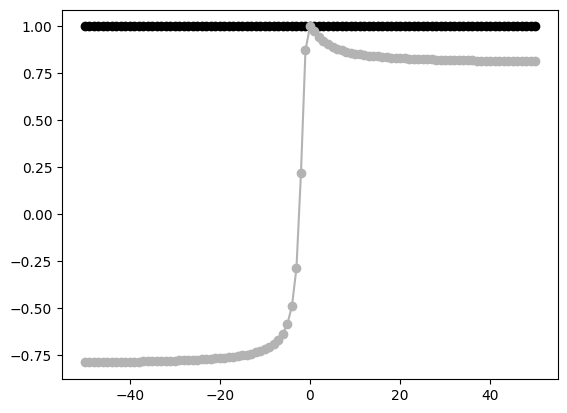

In [53]:
# Exercise 4-2
a = np.arange(4, dtype=float)
offsets = np.arange(-50,51)

# initialize the results
results = np.zeros((len(offsets), 2))

for i in range(len(offsets)):
    b = a + offsets[i]
    results[i, :] = corr_and_cosine(a, b)

h = plt.plot(offsets, results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([0.7,0.7,0.7])
h[1].set_marker('o')

plt.show()

In [4]:
# Exercise 4-3
# import the function
from scipy.stats import pearsonr

# inspect the source code
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets. Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

This function also performs a test of the null hypothesis that the
distributions underlying the samples are uncorrelated and normally
distributed. (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)
The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these da

In [5]:
# Exercise 4-4
# a bare-bones correlation function
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d

# import the time library
import time

# experiment parameters
numIters  = 1000
varLength =  500

# clock custom-written function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  rho(x[:,0],x[:,1])
t1 = time.time() - tic

# now for numpy's corrcoef function
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic

# print the results!
# Note: time() returns seconds, so I multiply by 1000 for ms
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 42.66 ms
   pearsonr took 134.52 ms


### k-means clustering

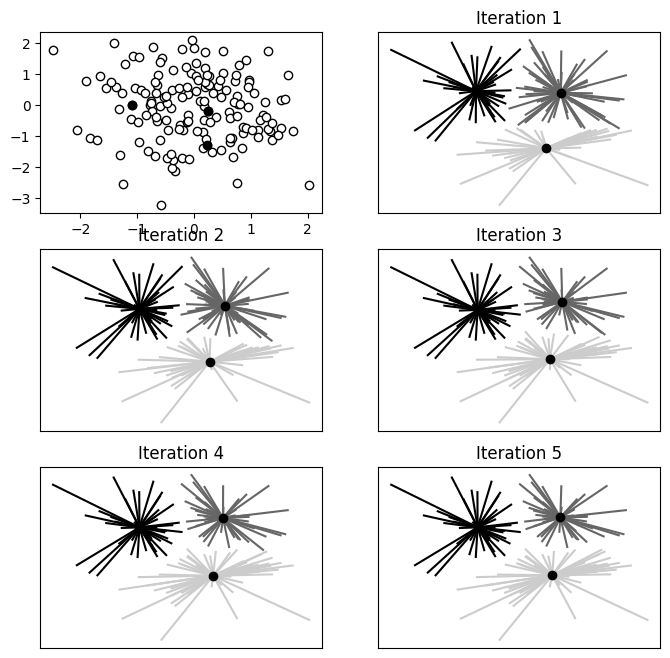

In [ ]:
a = np.random.randn(150, 2)
k = 3
rindx = np.random.choice(range(len(a)), k, replace=False)
centroids = a[rindx, :]

fig,axs = plt.subplots(3,2, figsize=(8,8))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'

axs[0].plot(a[:,0], a[:,1], "ko", markerfacecolor = "w")
axs[0].plot(centroids[:,0], centroids[:,1], 'ko')

for iteri in range(5):

    # Computer distances
    dists = np.zeros((a.shape[0], k))
    for ci in range(k):
        dists[:, ci] = np.sum((a - centroids[ci, :])**2, axis=1)

    # Assign to group based on min distance
    groupidx = np.argmin(dists, axis=1)

    # Reassign centroids
    for ki in range(k):
        centroids[ki, :] = [np.mean(a[groupidx==ki, 0]),
                            np.mean(a[groupidx==ki, 1])]
        
    # plot data points
    for i in range(len(a)):
        axs[iteri+1].plot([a[i,0],centroids[groupidx[i],0] ],[ a[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
    axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
    axs[iteri+1].set_title(f'Iteration {iteri+1}')
    axs[iteri+1].set_xticks([])
    axs[iteri+1].set_yticks([])


Text(0.5, 1.0, 'Time series signal')

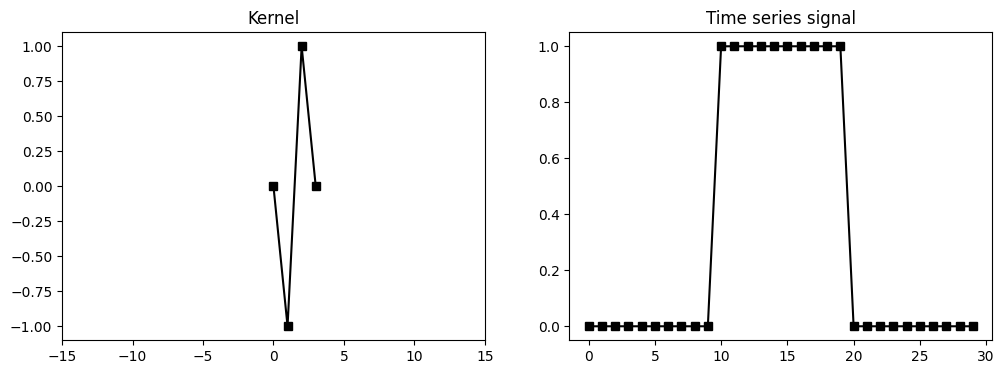

In [2]:
# Exercise 4-5
# create the kernel
kernel = np.array([0,-1,1, 0])

# and the "signal"
signal = np.zeros(30)
signal[10:20] = 1

# plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')


In [5]:
# initialize the feature map as zeros
feature_map = np.zeros(len(signal))

for t in range(1, len(signal)-3):
    feature_map[t] = np.dot(kernel, signal[t-1:t+3])
    print(f"t:{t}     Feature map: {feature_map[t]}     Signal: {signal[t-1:t+3]}")


t:1     Feature map: 0.0     Signal: [0. 0. 0. 0.]
t:2     Feature map: 0.0     Signal: [0. 0. 0. 0.]
t:3     Feature map: 0.0     Signal: [0. 0. 0. 0.]
t:4     Feature map: 0.0     Signal: [0. 0. 0. 0.]
t:5     Feature map: 0.0     Signal: [0. 0. 0. 0.]
t:6     Feature map: 0.0     Signal: [0. 0. 0. 0.]
t:7     Feature map: 0.0     Signal: [0. 0. 0. 0.]
t:8     Feature map: 0.0     Signal: [0. 0. 0. 1.]
t:9     Feature map: 1.0     Signal: [0. 0. 1. 1.]
t:10     Feature map: 0.0     Signal: [0. 1. 1. 1.]
t:11     Feature map: 0.0     Signal: [1. 1. 1. 1.]
t:12     Feature map: 0.0     Signal: [1. 1. 1. 1.]
t:13     Feature map: 0.0     Signal: [1. 1. 1. 1.]
t:14     Feature map: 0.0     Signal: [1. 1. 1. 1.]
t:15     Feature map: 0.0     Signal: [1. 1. 1. 1.]
t:16     Feature map: 0.0     Signal: [1. 1. 1. 1.]
t:17     Feature map: 0.0     Signal: [1. 1. 1. 1.]
t:18     Feature map: 0.0     Signal: [1. 1. 1. 0.]
t:19     Feature map: -1.0     Signal: [1. 1. 0. 0.]
t:20     Feature map

In [7]:
np.dot(kernel, np.array([0,0,0,1]))

np.int64(0)

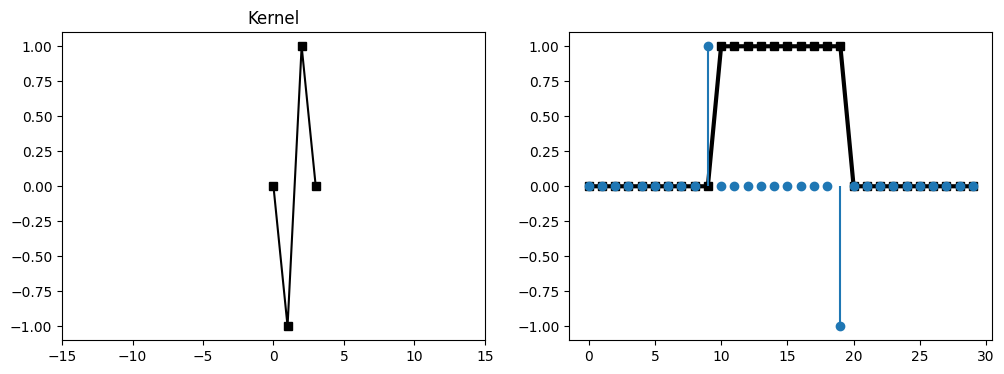

In [94]:
# plot results
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])


axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(feature_map)),feature_map,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

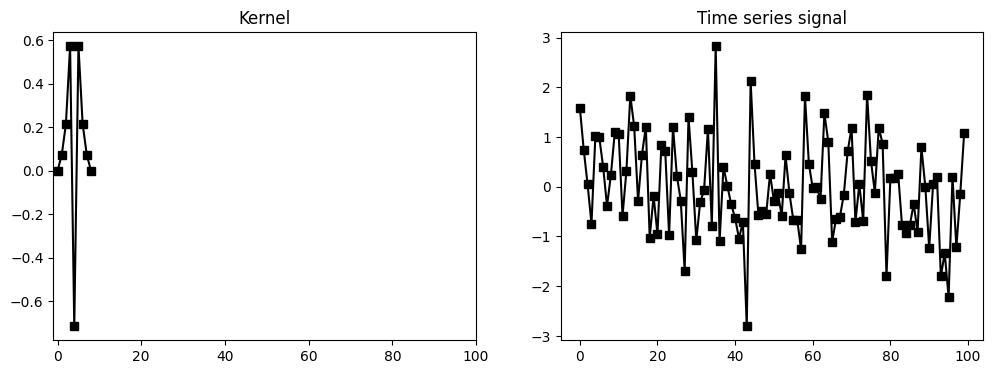

In [16]:
# Exercise 4-6
# define the kernel (a sorta-kinda Gaussian)
kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# some handy length parameters
Nkernel = len(kernel)
halfKrn = Nkernel//2


# and the signal
Nsignal = 100
timeseries = np.random.randn(Nsignal)

# plot them
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.show()

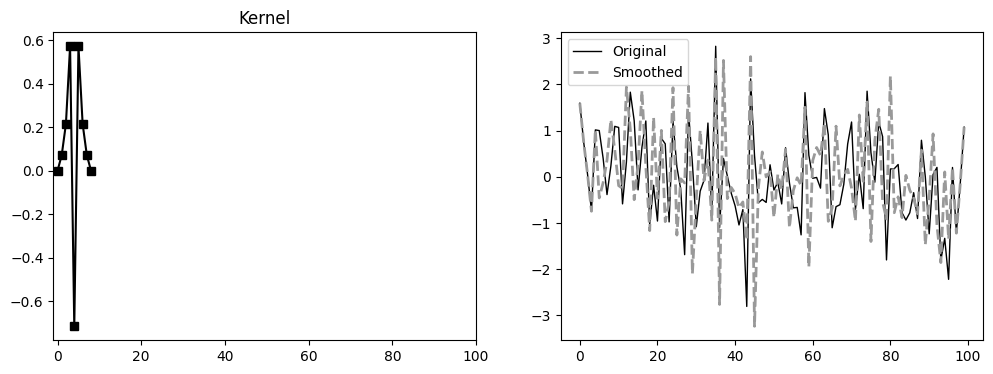

In [17]:
# make a copy of the signal for filtering
filtsig = timeseries.copy()

# loop over the signal time points
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# and plot
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.show()

np.float64(0.9999999999999998)